# <font color="red"> Graph Compare</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# <font color="red">Brute Force Algorithm - All Possible Combinations</font>

In [2]:
#Random Sum value generated randomly by random library, and used in every algorithm for identify the time complexity
random_sum = [150, 270, 351, 370, 385, 431, 510, 675, 831, 987]

In [3]:
#Random Coin Set generated randomly by random library, and used in every algorithm for identify the time complexity
CoinSet = [[37, 51, 73],
           [54, 73, 80, 93],
           [6, 17, 25, 33, 64],
           [6, 9, 11, 22, 29, 76],
           [25, 26, 33, 47, 78, 90, 99],
           [16, 28, 31, 64, 78, 83, 86, 96],
           [4, 37, 44, 48, 53, 65, 67, 86, 94],
           [12, 14, 21, 22, 29, 50, 57, 58, 74, 92],
           [5, 10, 11, 16, 56, 66, 77, 82, 90, 94, 96],
           [6, 10, 20, 23, 33, 38, 39, 41, 62, 87, 96, 98]]

In [4]:
#variable that can adjust the plotting parameter
fixed_sum = 987
coins = CoinSet[9]

In [5]:
times_fixed_sum = [0.001037, 0.000962, 0.636038, 29.585859, 0.304000, 0.910002, 12.777161, 235.253021, 1178.775091, 5451.852293]

In [6]:
times_fixed_coinset = [0.009512, 0.226187, 1.250064, 1.792016, 2.376932, 5.346922, 18.877348, 178.382626, 1094.257002, 5329.574785]

### For fixed sum amount

In [7]:
#declaring two variable for storing the data points
y_fixed_sum = []
x_fixed_sum = []

#this loop will change the coin set and call the function to calculate the execution time
for coins in CoinSet:
    #storing the data point for ploting
    y_fixed_sum.append(pow(2, fixed_sum + len(coins)))
    x_fixed_sum.append(len(coins))


# Convert lists to numpy arrays
y_fixed_sum = np.array(y_fixed_sum)

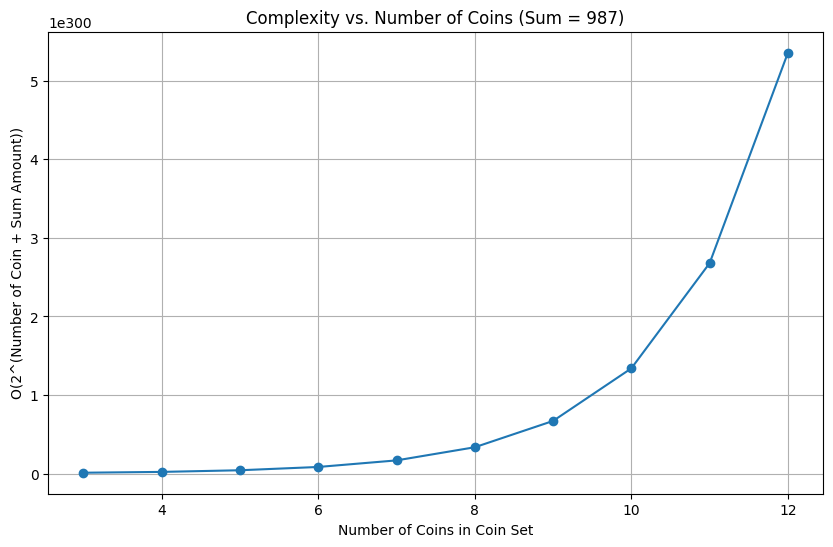

In [8]:
#using the matplotlib library
plt.figure(figsize=(10, 6))
plt.plot(x_fixed_sum, y_fixed_sum, 'o-')
plt.xlabel('Number of Coins in Coin Set')
plt.ylabel('O(2^(Number of Coin + Sum Amount))')
plt.title(f'Complexity vs. Number of Coins (Sum = {fixed_sum})')
plt.grid(True)
plt.show()

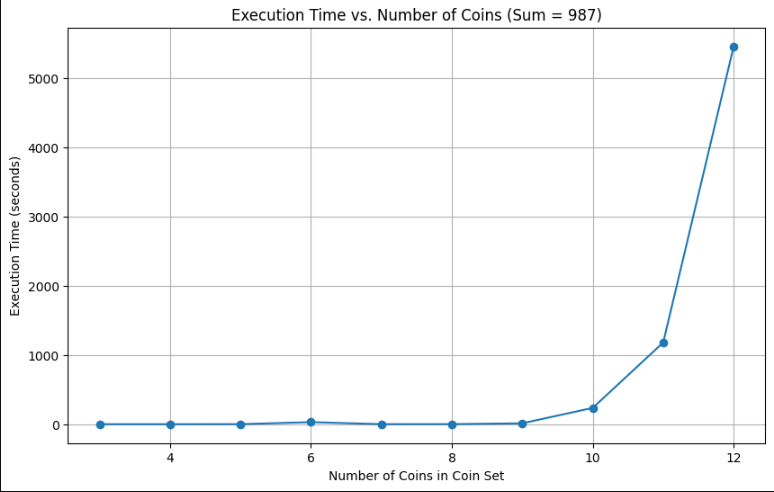

### Combined Graph

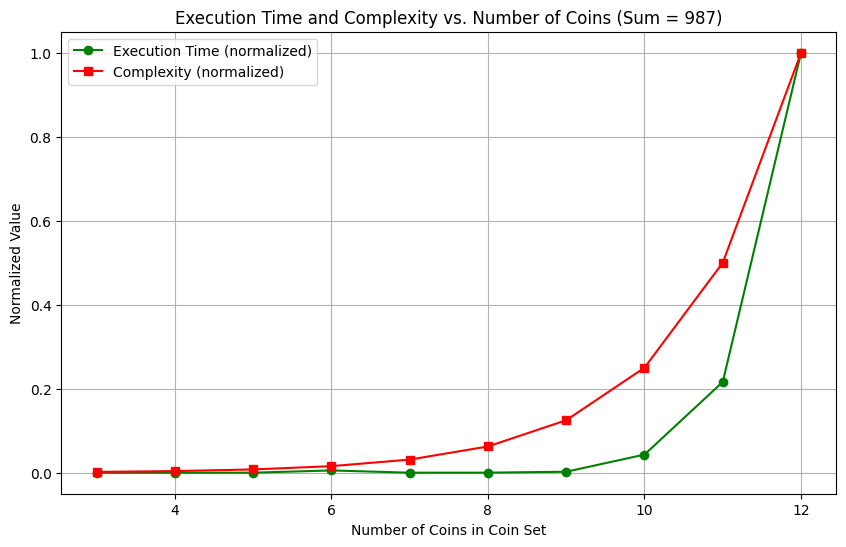

In [9]:
# Normalizing the data
normalized_times_fixed_sum = times_fixed_sum / np.max(times_fixed_sum)
normalized_y_fixed_sum = y_fixed_sum / np.max(y_fixed_sum)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_fixed_sum, normalized_times_fixed_sum, 'o-', color='green', label='Execution Time (normalized)')
plt.plot(x_fixed_sum, normalized_y_fixed_sum, 's-', color='red', label='Complexity (normalized)')
plt.xlabel('Number of Coins in Coin Set')
plt.ylabel('Normalized Value')
plt.title('Execution Time and Complexity vs. Number of Coins (Sum = 987)')
plt.legend()
plt.grid(True)
plt.show()

### For fixed Coin Set

In [10]:
#declaring two variable for storing the data points
y_fixed_coins = []
x_fixed_coins = []

#this loop will change the coin set and call the function to calculate the execution time
for sum_value in random_sum:
    #storing the data point for ploting
    y_fixed_coins.append(pow(2, sum_value + len(coins)))
    x_fixed_coins.append(sum_value)

# Convert lists to numpy arrays
y_fixed_coins = np.array(y_fixed_coins)

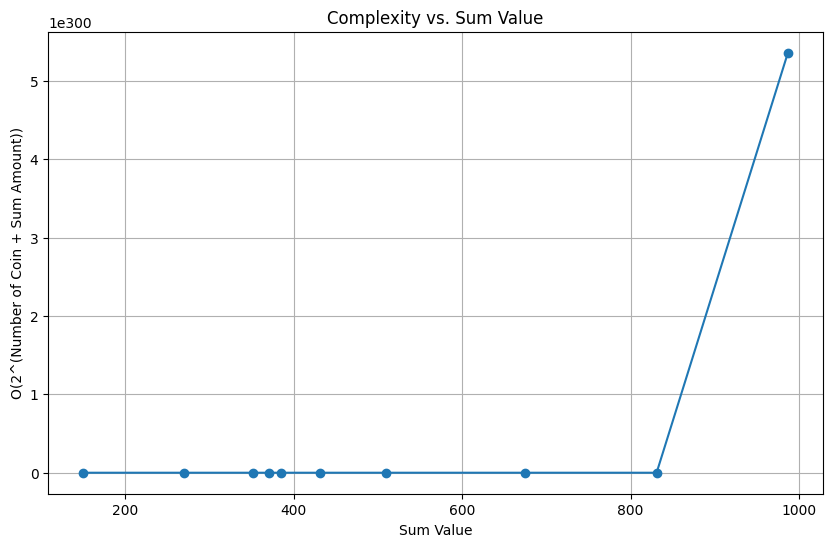

In [11]:
#using the matplotlib library
plt.figure(figsize=(10, 6))
plt.plot(x_fixed_coins, y_fixed_coins, 'o-')
plt.xlabel('Sum Value')
plt.ylabel('O(2^(Number of Coin + Sum Amount))')
plt.title(f'Complexity vs. Sum Value')
plt.grid(True)
plt.show()

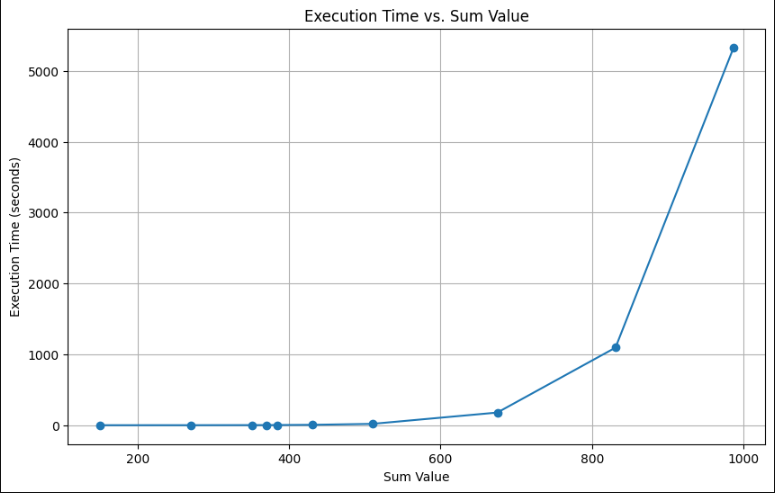

### Combined Graph

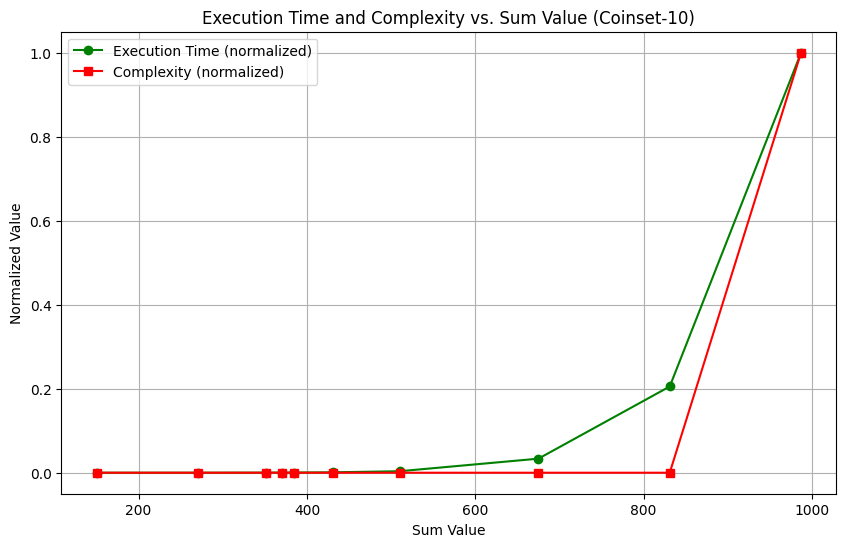

In [12]:
# Normalizing the data
normalized_times_fixed_coinset = times_fixed_coinset / np.max(times_fixed_coinset)
normalized_y_fixed_coin = y_fixed_coins / np.max(y_fixed_coins)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_fixed_coins, normalized_times_fixed_coinset, 'o-', color='green', label='Execution Time (normalized)')
plt.plot(x_fixed_coins, normalized_y_fixed_coin, 's-', color='red', label='Complexity (normalized)')
plt.xlabel('Sum Value')
plt.ylabel('Normalized Value')
plt.title('Execution Time and Complexity vs. Sum Value (Coinset-10)')
plt.legend()
plt.grid(True)
plt.show()

# <font color="red">Dynamic Programing - Recursive</font>

In [13]:
#Random Sum value generated randomly by random library, and used in every algorithm for identify the time complexity
random_sum = [148379, 203158, 363103, 457966, 472585, 663706, 741838, 910374, 950201, 978368]

In [14]:
#Random Coin Set generated randomly by random library, and used in every algorithm for identify the time complexity
CoinSet = [[37, 47, 218, 231, 349, 367, 429, 452, 457, 536, 539, 708, 828, 871, 1000],
           [68, 114, 123, 171, 199, 255, 295, 537, 553, 627, 631, 659, 661, 687, 866, 913, 929, 945, 966],
           [11, 82, 119, 296, 332, 339, 348, 388, 404, 421, 436, 447, 472, 486, 543, 561, 570, 818, 845, 891, 991],
           [25, 56, 84, 223, 341, 375, 401, 410, 452, 464, 514, 517, 520, 535, 559, 596, 720, 760, 785, 814, 829, 831, 857, 866, 893, 895, 912, 933, 953, 993],
           [2, 10, 38, 59, 61, 63, 121, 160, 162, 166, 202, 205, 237, 263, 290, 313, 401, 402, 414, 459, 512, 576, 584, 614, 642, 648, 650, 671, 686, 689, 779, 798, 811, 870, 990],
           [46, 71, 102, 103, 109, 140, 143, 172, 174, 178, 203, 218, 264, 266, 286, 287, 293, 343, 378, 384, 404, 455, 464, 467, 482, 493, 497, 498, 507, 525, 539, 550, 586, 602, 603, 606, 664, 679, 683, 694, 714, 751, 754, 810, 813, 814, 815, 865, 895, 899, 912, 919, 936, 953, 967, 970, 991, 995],
           [3, 16, 21, 39, 47, 50, 86, 89, 104, 110, 129, 135, 166, 184, 217, 227, 253, 256, 264, 296, 313, 324, 351, 354, 360, 361, 382, 395, 468, 479, 481, 483, 488, 496, 498, 509, 527, 537, 562, 571, 582, 583, 599, 610, 641, 642, 644, 649, 669, 671, 682, 725, 734, 745, 782, 816, 834, 847, 862, 892, 896, 898, 904, 914, 917, 935, 937, 941, 949, 987, 989, 998],
           [8, 12, 32, 40, 42, 46, 53, 65, 80, 83, 116, 118, 119, 150, 151, 158, 174, 175, 196, 198, 222, 225, 235, 238, 239, 256, 287, 296, 299, 300, 302, 308, 333, 347, 374, 381, 397, 403, 415, 433, 445, 482, 492, 495, 511, 512, 553, 564, 579, 583, 597, 600, 603, 659, 683, 686, 691, 697, 707, 711, 725, 730, 736, 750, 776, 778, 789, 830, 835, 836, 841, 853, 867, 868, 883, 893, 935, 971, 978, 990, 996, 998],
           [1, 13, 15, 20, 21, 35, 55, 56, 74, 96, 112, 162, 170, 181, 186, 198, 200, 201, 211, 213, 216, 218, 233, 240, 249, 268, 276, 279, 295, 298, 299, 312, 322, 335, 337, 344, 347, 356, 371, 399, 407, 408, 412, 422, 432, 434, 448, 460, 468, 484, 489, 494, 524, 532, 537, 553, 556, 559, 562, 566, 583, 593, 599, 613, 624, 634, 639, 667, 680, 682, 688, 691, 701, 705, 721, 732, 748, 767, 808, 811, 812, 821, 850, 862, 868, 872, 889, 894, 901, 921, 934, 966, 1000],
           [16, 19, 47, 61, 76, 78, 108, 121, 129, 143, 146, 155, 162, 164, 170, 180, 181, 182, 186, 227, 230, 236, 241, 243, 244, 258, 276, 282, 283, 284, 287, 293, 307, 334, 355, 378, 384, 386, 389, 395, 416, 439, 450, 454, 461, 473, 477, 480, 489, 498, 505, 518, 527, 550, 555, 563, 567, 577, 585, 599, 610, 616, 625, 626, 646, 663, 666, 692, 693, 708, 715, 724, 727, 729, 743, 744, 748, 750, 768, 790, 806, 823, 833, 840, 850, 854, 855, 874, 887, 892, 913, 924, 953, 968, 981, 994, 995]]

In [15]:
fixed_sum = 978368
coins = CoinSet[9]

In [16]:
times_fixed_sum_recursive = [16.426877, 21.069382, 22.965867, 35.710052, 38.521925, 81.846026, 95.521500, 101.293533, 137.210986, 141.097606]

In [17]:
times_fixed_coinset_recursive = [18.468294, 23.953040, 44.978028, 57.420830, 60.133917, 83.682716, 96.059953, 119.454623, 139.424352, 147.645548]

### For fixed Sum Amount

In [18]:
#declaring two variable for storing the data points
y_fixed_sum = []
x_fixed_sum = []

#this loop will change the coin set and call the function to calculate the execution time
for coins in CoinSet:
    #storing the data point for ploting
    y_fixed_sum.append(fixed_sum * len(coins))
    x_fixed_sum.append(len(coins))

# Convert lists to numpy arrays
y_fixed_sum = np.array(y_fixed_sum)

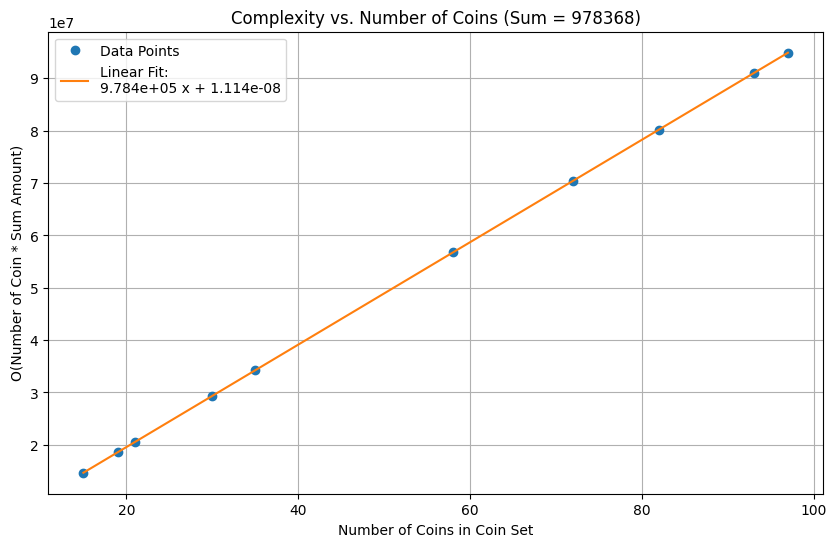

In [19]:
coefficients_linear = np.polyfit(x_fixed_sum, y_fixed_sum, 1)
linear = np.poly1d(coefficients_linear)

# Generate x values for plotting the Linear
x_linear = np.linspace(min(x_fixed_sum), max(x_fixed_sum), 500)
y_linear = linear(x_linear)

plt.figure(figsize=(10, 6))
plt.plot(x_fixed_sum, y_fixed_sum, 'o', label='Data Points')
plt.plot(x_linear, y_linear, '-', label=f'Linear Fit: {linear}')
plt.xlabel('Number of Coins in Coin Set')
plt.ylabel('O(Number of Coin * Sum Amount)')
plt.title(f'Complexity vs. Number of Coins (Sum = {fixed_sum})')
plt.legend()
plt.grid(True)
plt.show()

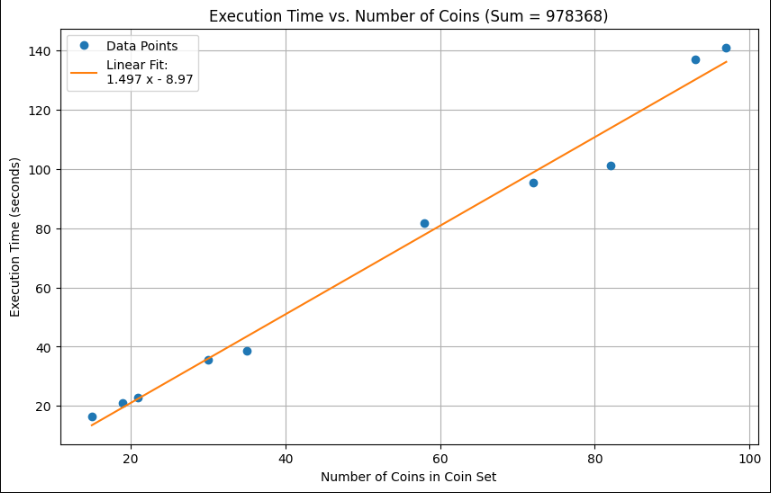

### Combined Graph

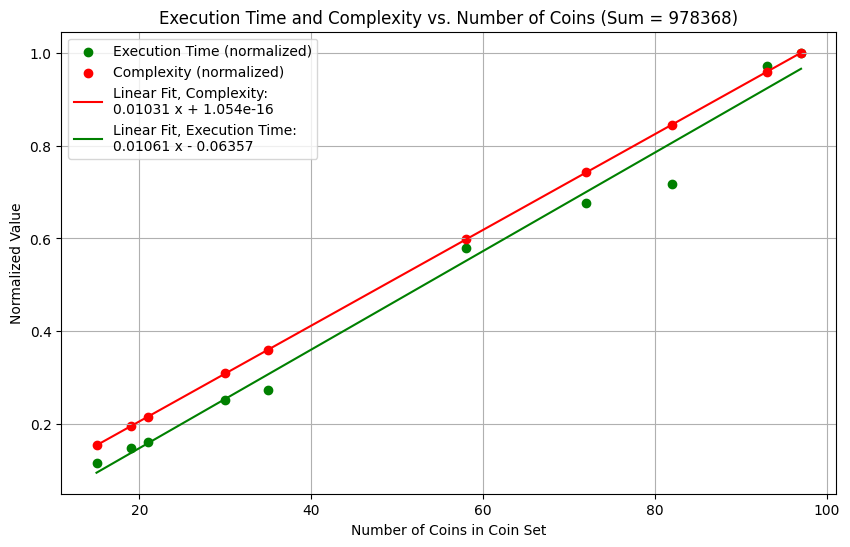

In [20]:
# Normalizing the data
normalized_times_fixed_sum_recursive = times_fixed_sum_recursive / np.max(times_fixed_sum_recursive)
normalized_y_fixed_sum = y_fixed_sum / np.max(y_fixed_sum)

coefficients_linear_complexity = np.polyfit(x_fixed_sum, normalized_y_fixed_sum, 1)
coefficients_linear_execution = np.polyfit(x_fixed_sum, normalized_times_fixed_sum_recursive, 1)
linear_complexity = np.poly1d(coefficients_linear_complexity)
linear_execution = np.poly1d(coefficients_linear_execution)

# Generate x values for plotting the Linear
x_linear = np.linspace(min(x_fixed_sum), max(x_fixed_sum), 500)
y_linear_complexity = linear_complexity(x_linear)
y_linear_execution = linear_execution(x_linear)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_fixed_sum, normalized_times_fixed_sum_recursive, color='green', label='Execution Time (normalized)')
plt.scatter(x_fixed_sum, normalized_y_fixed_sum, color='red', label='Complexity (normalized)')
plt.plot(x_linear, y_linear_complexity, '-', color='red', label=f'Linear Fit, Complexity: {linear_complexity}')
plt.plot(x_linear, y_linear_execution, '-', color='green', label=f'Linear Fit, Execution Time: {linear_execution}')
plt.xlabel('Number of Coins in Coin Set')
plt.ylabel('Normalized Value')
plt.title('Execution Time and Complexity vs. Number of Coins (Sum = 978368)')
plt.legend()
plt.grid(True)
plt.show()

### For fixed Coin Set

In [21]:
#declaring two variable for storing the data points
y_fixed_coins = []
x_fixed_coins = []

#this loop will change the coin set and call the function to calculate the execution time
for sum_value in random_sum:
    #storing the data point for ploting
    y_fixed_coins.append(sum_value * len(coins))
    x_fixed_coins.append(sum_value)

# Convert lists to numpy arrays
y_fixed_coins = np.array(y_fixed_coins)

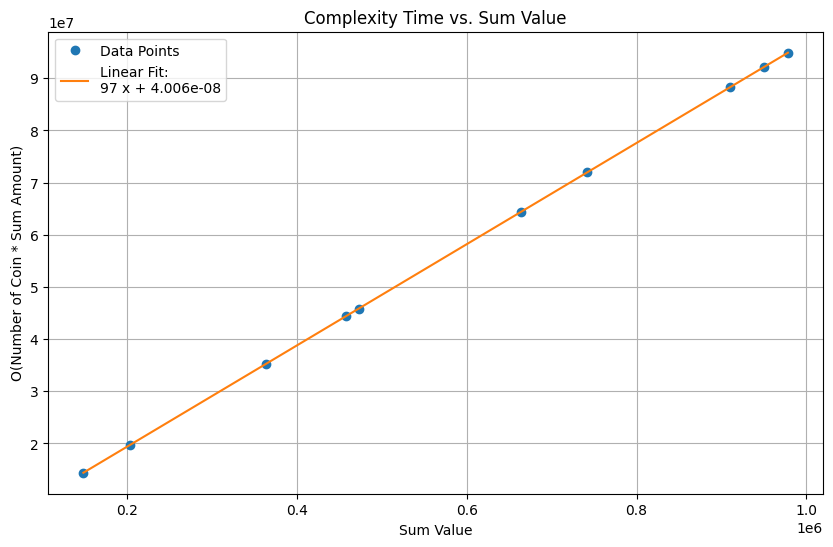

In [22]:
coefficients_linear = np.polyfit(x_fixed_coins, y_fixed_coins, 1)
linear = np.poly1d(coefficients_linear)

# Generate x values for plotting the polynomial
x_linear = np.linspace(min(x_fixed_coins), max(x_fixed_coins), 500)
y_linear = linear(x_linear)

plt.figure(figsize=(10, 6))
plt.plot(x_fixed_coins, y_fixed_coins, 'o', label='Data Points')
plt.plot(x_linear, y_linear, '-', label=f'Linear Fit: {linear}')
plt.xlabel('Sum Value')
plt.ylabel('O(Number of Coin * Sum Amount)')
plt.title(f'Complexity Time vs. Sum Value') # (Coin Set = {coins})
plt.legend()
plt.grid(True)
plt.show()

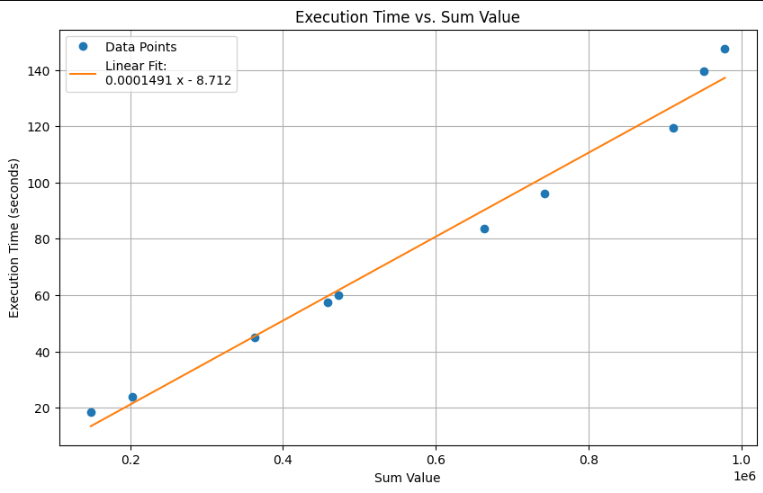

### Combined Graph

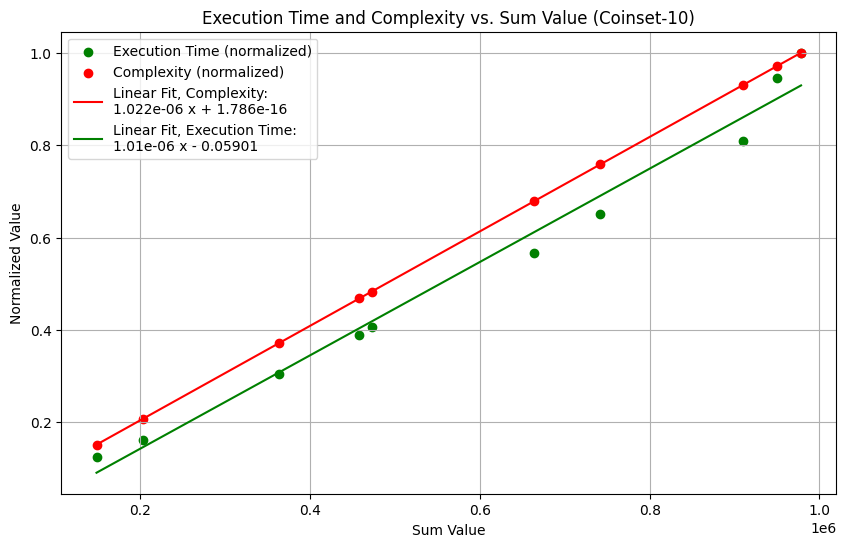

In [23]:
# Normalizing the data
normalized_times_fixed_coinset_recursive = times_fixed_coinset_recursive / np.max(times_fixed_coinset_recursive)
normalized_y_fixed_coin = y_fixed_coins / np.max(y_fixed_coins)

coefficients_linear_complexity = np.polyfit(x_fixed_coins, normalized_y_fixed_coin, 1)
coefficients_linear_execution = np.polyfit(x_fixed_coins, normalized_times_fixed_coinset_recursive, 1)
linear_complexity = np.poly1d(coefficients_linear_complexity)
linear_execution = np.poly1d(coefficients_linear_execution)

# Generate x values for plotting the Linear
x_linear = np.linspace(min(x_fixed_coins), max(x_fixed_coins), 500)
y_linear_complexity = linear_complexity(x_linear)
y_linear_execution = linear_execution(x_linear)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_fixed_coins, normalized_times_fixed_coinset_recursive, color='green', label='Execution Time (normalized)')
plt.scatter(x_fixed_coins, normalized_y_fixed_coin, color='red', label='Complexity (normalized)')
plt.plot(x_linear, y_linear_complexity, '-', color='red', label=f'Linear Fit, Complexity: {linear_complexity}')
plt.plot(x_linear, y_linear_execution, '-', color='green', label=f'Linear Fit, Execution Time: {linear_execution}')
plt.xlabel('Sum Value')
plt.ylabel('Normalized Value')
plt.title('Execution Time and Complexity vs. Sum Value (Coinset-10)')
plt.legend()
plt.grid(True)
plt.show()

# <font color="red">Dynamic Programing - Iterative</font>

In [24]:
#Random Sum value generated randomly by random library, and used in every algorithm for identify the time complexity
random_sum = [148379, 203158, 363103, 457966, 472585, 663706, 741838, 910374, 950201, 978368]

In [25]:
#Random Coin Set generated randomly by random library, and used in every algorithm for identify the time complexity
CoinSet = [[37, 47, 218, 231, 349, 367, 429, 452, 457, 536, 539, 708, 828, 871, 1000],
           [68, 114, 123, 171, 199, 255, 295, 537, 553, 627, 631, 659, 661, 687, 866, 913, 929, 945, 966],
           [11, 82, 119, 296, 332, 339, 348, 388, 404, 421, 436, 447, 472, 486, 543, 561, 570, 818, 845, 891, 991],
           [25, 56, 84, 223, 341, 375, 401, 410, 452, 464, 514, 517, 520, 535, 559, 596, 720, 760, 785, 814, 829, 831, 857, 866, 893, 895, 912, 933, 953, 993],
           [2, 10, 38, 59, 61, 63, 121, 160, 162, 166, 202, 205, 237, 263, 290, 313, 401, 402, 414, 459, 512, 576, 584, 614, 642, 648, 650, 671, 686, 689, 779, 798, 811, 870, 990],
           [46, 71, 102, 103, 109, 140, 143, 172, 174, 178, 203, 218, 264, 266, 286, 287, 293, 343, 378, 384, 404, 455, 464, 467, 482, 493, 497, 498, 507, 525, 539, 550, 586, 602, 603, 606, 664, 679, 683, 694, 714, 751, 754, 810, 813, 814, 815, 865, 895, 899, 912, 919, 936, 953, 967, 970, 991, 995],
           [3, 16, 21, 39, 47, 50, 86, 89, 104, 110, 129, 135, 166, 184, 217, 227, 253, 256, 264, 296, 313, 324, 351, 354, 360, 361, 382, 395, 468, 479, 481, 483, 488, 496, 498, 509, 527, 537, 562, 571, 582, 583, 599, 610, 641, 642, 644, 649, 669, 671, 682, 725, 734, 745, 782, 816, 834, 847, 862, 892, 896, 898, 904, 914, 917, 935, 937, 941, 949, 987, 989, 998],
           [8, 12, 32, 40, 42, 46, 53, 65, 80, 83, 116, 118, 119, 150, 151, 158, 174, 175, 196, 198, 222, 225, 235, 238, 239, 256, 287, 296, 299, 300, 302, 308, 333, 347, 374, 381, 397, 403, 415, 433, 445, 482, 492, 495, 511, 512, 553, 564, 579, 583, 597, 600, 603, 659, 683, 686, 691, 697, 707, 711, 725, 730, 736, 750, 776, 778, 789, 830, 835, 836, 841, 853, 867, 868, 883, 893, 935, 971, 978, 990, 996, 998],
           [1, 13, 15, 20, 21, 35, 55, 56, 74, 96, 112, 162, 170, 181, 186, 198, 200, 201, 211, 213, 216, 218, 233, 240, 249, 268, 276, 279, 295, 298, 299, 312, 322, 335, 337, 344, 347, 356, 371, 399, 407, 408, 412, 422, 432, 434, 448, 460, 468, 484, 489, 494, 524, 532, 537, 553, 556, 559, 562, 566, 583, 593, 599, 613, 624, 634, 639, 667, 680, 682, 688, 691, 701, 705, 721, 732, 748, 767, 808, 811, 812, 821, 850, 862, 868, 872, 889, 894, 901, 921, 934, 966, 1000],
           [16, 19, 47, 61, 76, 78, 108, 121, 129, 143, 146, 155, 162, 164, 170, 180, 181, 182, 186, 227, 230, 236, 241, 243, 244, 258, 276, 282, 283, 284, 287, 293, 307, 334, 355, 378, 384, 386, 389, 395, 416, 439, 450, 454, 461, 473, 477, 480, 489, 498, 505, 518, 527, 550, 555, 563, 567, 577, 585, 599, 610, 616, 625, 626, 646, 663, 666, 692, 693, 708, 715, 724, 727, 729, 743, 744, 748, 750, 768, 790, 806, 823, 833, 840, 850, 854, 855, 874, 887, 892, 913, 924, 953, 968, 981, 994, 995]]

In [26]:
fixed_sum = 978368
coins = CoinSet[9]

In [27]:
times_fixed_sum_iterative = [1.258994, 1.573999, 1.735007, 2.521034, 2.959222, 5.110038, 6.444001, 7.430962, 8.390549, 9.308359]

In [28]:
times_fixed_coinset_iterative = [1.351000, 1.760037, 3.288960, 4.011295, 4.268224, 5.744173, 6.534043, 8.477958, 8.532000, 8.651145]

### For fixed Sum

In [29]:
#declaring two variable for storing the data points
y_fixed_sum = []
x_fixed_sum = []

#this loop will change the coin set and call the function to calculate the execution time
for coins in CoinSet:
    #storing the data point for ploting
    y_fixed_sum.append(fixed_sum * len(coins))
    x_fixed_sum.append(len(coins))

# Convert lists to numpy arrays
y_fixed_sum = np.array(y_fixed_sum)

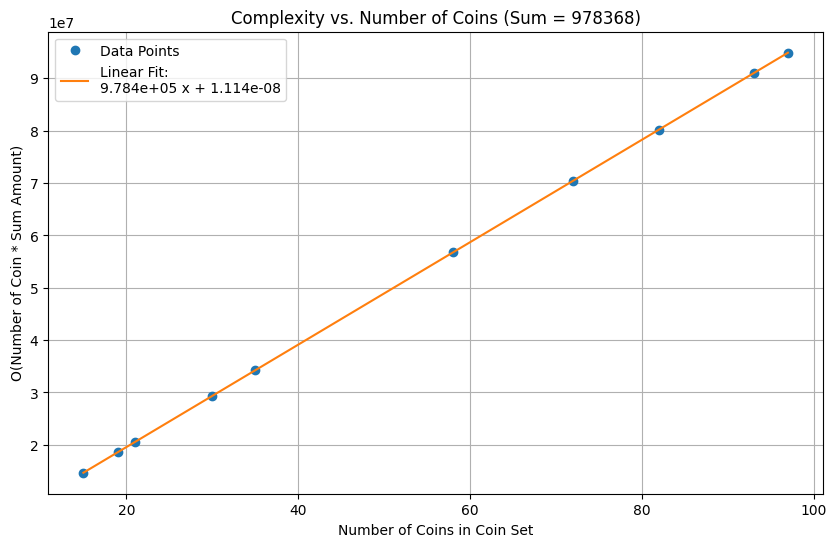

In [30]:
coefficients_linear = np.polyfit(x_fixed_sum, y_fixed_sum, 1)
linear = np.poly1d(coefficients_linear)

# Generate x values for plotting the Linear
x_linear = np.linspace(min(x_fixed_sum), max(x_fixed_sum), 500)
y_linear = linear(x_linear)

plt.figure(figsize=(10, 6))
plt.plot(x_fixed_sum, y_fixed_sum, 'o', label='Data Points')
plt.plot(x_linear, y_linear, '-', label=f'Linear Fit: {linear}')
plt.xlabel('Number of Coins in Coin Set')
plt.ylabel('O(Number of Coin * Sum Amount)')
plt.title(f'Complexity vs. Number of Coins (Sum = {fixed_sum})')
plt.legend()
plt.grid(True)
plt.show()

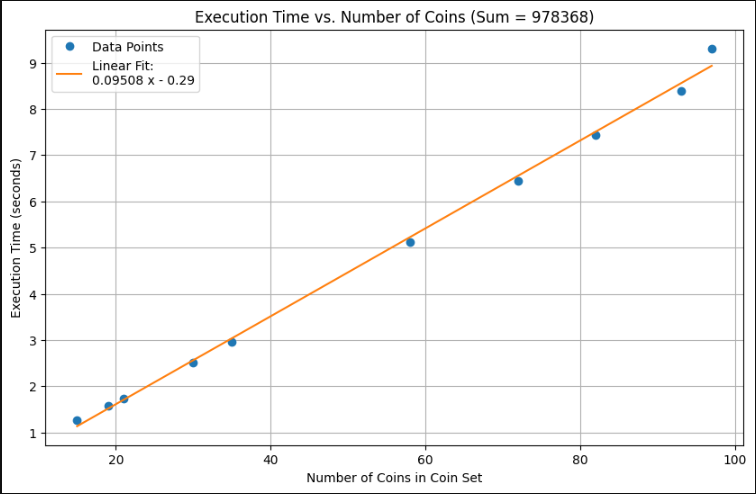

### Combined Graph

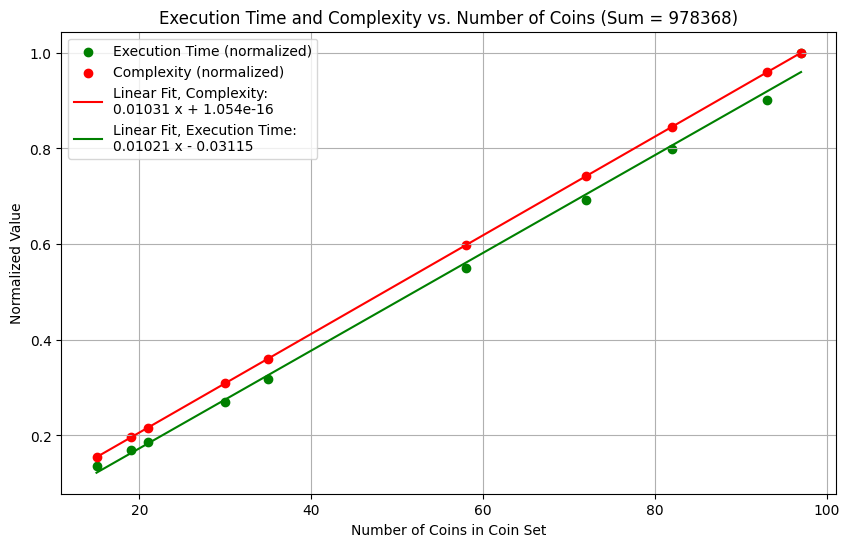

In [31]:
# Normalizing the data
normalized_times_fixed_sum_iterative = times_fixed_sum_iterative / np.max(times_fixed_sum_iterative)
normalized_y_fixed_sum = y_fixed_sum / np.max(y_fixed_sum)

coefficients_linear_complexity = np.polyfit(x_fixed_sum, normalized_y_fixed_sum, 1)
coefficients_linear_execution = np.polyfit(x_fixed_sum, normalized_times_fixed_sum_iterative, 1)
linear_complexity = np.poly1d(coefficients_linear_complexity)
linear_execution = np.poly1d(coefficients_linear_execution)

# Generate x values for plotting the Linear
x_linear = np.linspace(min(x_fixed_sum), max(x_fixed_sum), 500)
y_linear_complexity = linear_complexity(x_linear)
y_linear_execution = linear_execution(x_linear)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_fixed_sum, normalized_times_fixed_sum_iterative, color='green', label='Execution Time (normalized)')
plt.scatter(x_fixed_sum, normalized_y_fixed_sum, color='red', label='Complexity (normalized)')
plt.plot(x_linear, y_linear_complexity, '-', color='red', label=f'Linear Fit, Complexity: {linear_complexity}')
plt.plot(x_linear, y_linear_execution, '-', color='green', label=f'Linear Fit, Execution Time: {linear_execution}')
plt.xlabel('Number of Coins in Coin Set')
plt.ylabel('Normalized Value')
plt.title('Execution Time and Complexity vs. Number of Coins (Sum = 978368)')
plt.legend()
plt.grid(True)
plt.show()

### For fixed Coin Set

In [32]:
#declaring two variable for storing the data points
y_fixed_coins = []
x_fixed_coins = []

#this loop will change the coin set and call the function to calculate the execution time
for sum_value in random_sum:
    #storing the data point for ploting
    y_fixed_coins.append(sum_value * len(coins))
    x_fixed_coins.append(sum_value)

# Convert lists to numpy arrays
y_fixed_coins = np.array(y_fixed_coins)

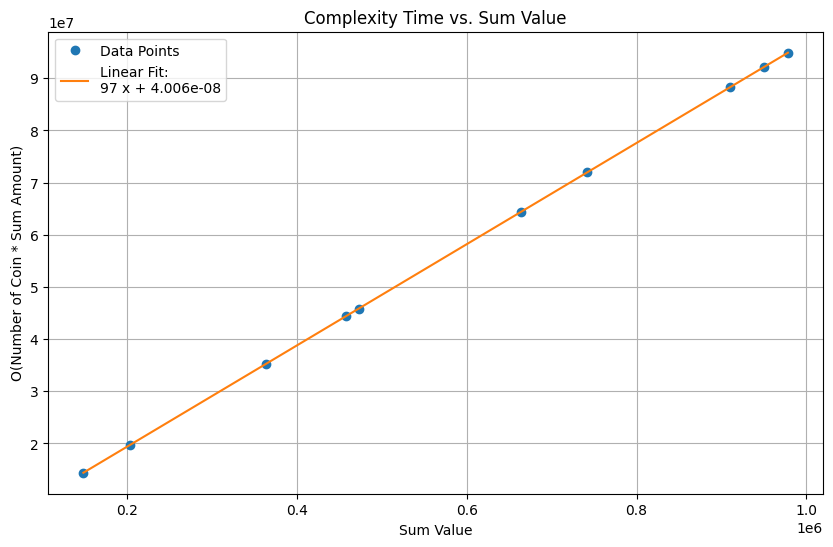

In [33]:
coefficients_linear = np.polyfit(x_fixed_coins, y_fixed_coins, 1)
linear = np.poly1d(coefficients_linear)

# Generate x values for plotting the polynomial
x_linear = np.linspace(min(x_fixed_coins), max(x_fixed_coins), 500)
y_linear = linear(x_linear)

plt.figure(figsize=(10, 6))
plt.plot(x_fixed_coins, y_fixed_coins, 'o', label='Data Points')
plt.plot(x_linear, y_linear, '-', label=f'Linear Fit: {linear}')
plt.xlabel('Sum Value')
plt.ylabel('O(Number of Coin * Sum Amount)')
plt.title(f'Complexity Time vs. Sum Value') # (Coin Set = {coins})
plt.legend()
plt.grid(True)
plt.show()

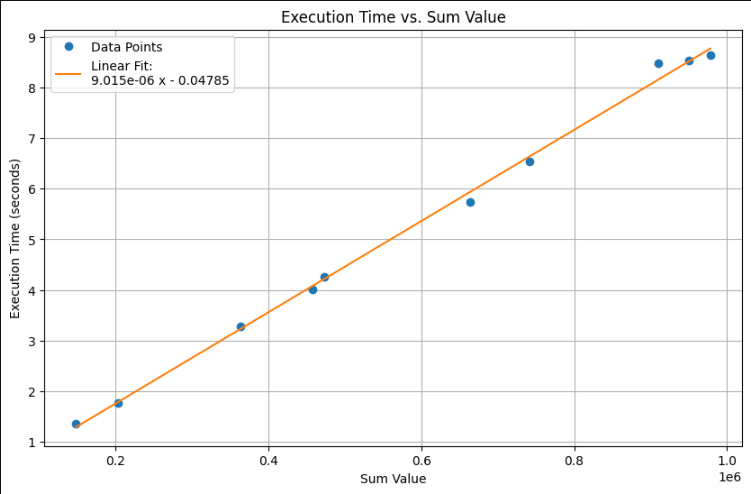

### Combined Graph

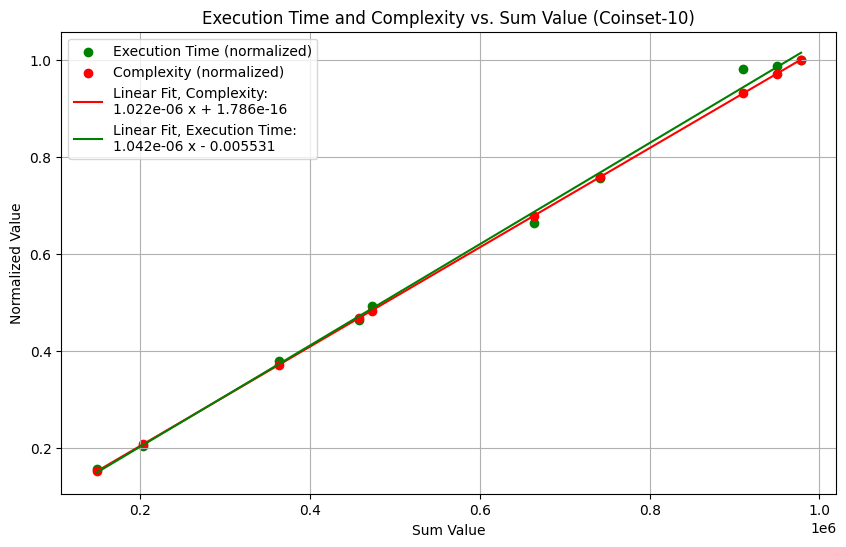

In [34]:
# Normalizing the data
normalized_times_fixed_coinset_iterative = times_fixed_coinset_iterative / np.max(times_fixed_coinset_iterative)
normalized_y_fixed_coin = y_fixed_coins / np.max(y_fixed_coins)

coefficients_linear_complexity = np.polyfit(x_fixed_coins, normalized_y_fixed_coin, 1)
coefficients_linear_execution = np.polyfit(x_fixed_coins, normalized_times_fixed_coinset_iterative, 1)
linear_complexity = np.poly1d(coefficients_linear_complexity)
linear_execution = np.poly1d(coefficients_linear_execution)

# Generate x values for plotting the Linear
x_linear = np.linspace(min(x_fixed_coins), max(x_fixed_coins), 500)
y_linear_complexity = linear_complexity(x_linear)
y_linear_execution = linear_execution(x_linear)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_fixed_coins, normalized_times_fixed_coinset_iterative, color='green', label='Execution Time (normalized)')
plt.scatter(x_fixed_coins, normalized_y_fixed_coin, color='red', label='Complexity (normalized)')
plt.plot(x_linear, y_linear_complexity, '-', color='red', label=f'Linear Fit, Complexity: {linear_complexity}')
plt.plot(x_linear, y_linear_execution, '-', color='green', label=f'Linear Fit, Execution Time: {linear_execution}')
plt.xlabel('Sum Value')
plt.ylabel('Normalized Value')
plt.title('Execution Time and Complexity vs. Sum Value (Coinset-10)')
plt.legend()
plt.grid(True)
plt.show()

# <font color="red">Dynamic Recursive vs. Iterative</font>

### For Fixed Sum

In [35]:
#declaring two variable for storing the data points
y_fixed_sum = []
x_fixed_sum = []

#this loop will change the coin set and call the function to calculate the execution time
for coins in CoinSet:
    #storing the data point for ploting
    y_fixed_sum.append(fixed_sum * len(coins))
    x_fixed_sum.append(len(coins))

# Convert lists to numpy arrays
y_fixed_sum = np.array(y_fixed_sum)

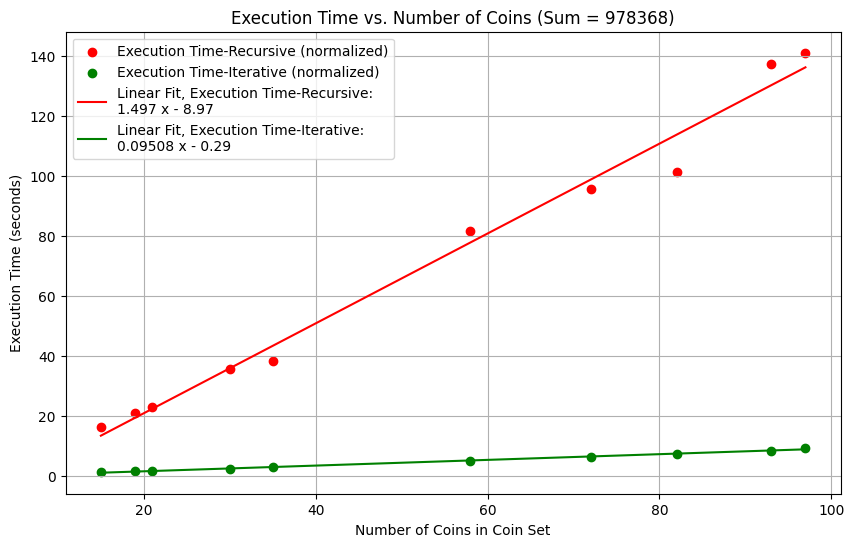

In [36]:
# Normalizing the data
times_fixed_sum_recursive
times_fixed_sum_iterative

coefficients_linear_execution_recursive = np.polyfit(x_fixed_sum, times_fixed_sum_recursive, 1)
coefficients_linear_execution_iterative = np.polyfit(x_fixed_sum, times_fixed_sum_iterative, 1)

linear_execution_recursive = np.poly1d(coefficients_linear_execution_recursive)
linear_execution_iterative = np.poly1d(coefficients_linear_execution_iterative)


# Generate x values for plotting the Linear
x_linear = np.linspace(min(x_fixed_sum), max(x_fixed_sum), 500)

y_linear_execution_recursive = linear_execution_recursive(x_linear)
y_linear_execution_iterative = linear_execution_iterative(x_linear)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_fixed_sum, times_fixed_sum_recursive, color='red', label='Execution Time-Recursive (normalized)')
plt.scatter(x_fixed_sum, times_fixed_sum_iterative, color='green', label='Execution Time-Iterative (normalized)')
plt.plot(x_linear, y_linear_execution_recursive, '-', color='red', label=f'Linear Fit, Execution Time-Recursive: {linear_execution_recursive}')
plt.plot(x_linear, y_linear_execution_iterative, '-', color='green', label=f'Linear Fit, Execution Time-Iterative: {linear_execution_iterative}')
plt.xlabel('Number of Coins in Coin Set')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs. Number of Coins (Sum = 978368)')
plt.legend()
plt.grid(True)
plt.show()

### For fixed Coin Set

In [37]:
#declaring two variable for storing the data points
y_fixed_coins = []
x_fixed_coins = []

#this loop will change the coin set and call the function to calculate the execution time
for sum_value in random_sum:
    #storing the data point for ploting
    y_fixed_coins.append(sum_value * len(coins))
    x_fixed_coins.append(sum_value)

# Convert lists to numpy arrays
y_fixed_coins = np.array(y_fixed_coins)

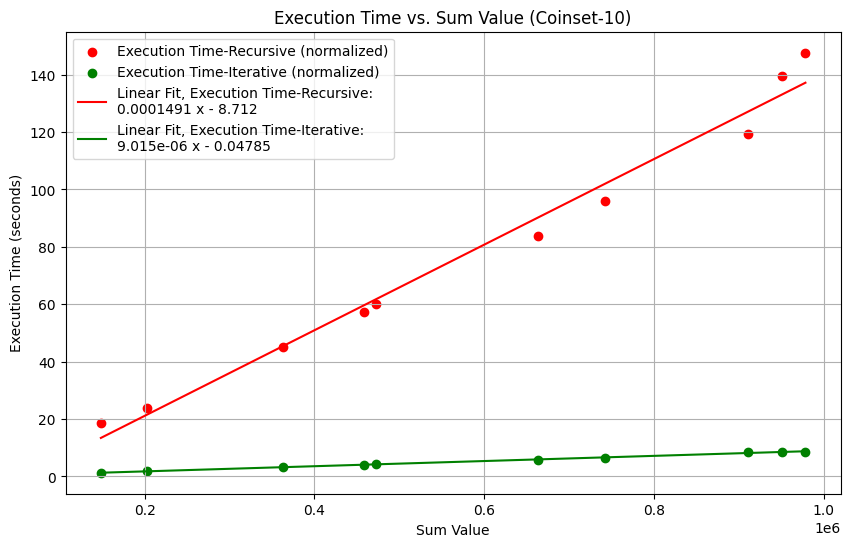

In [38]:
# Normalizing the data
times_fixed_coinset_recursive
times_fixed_coinset_iterative

coefficients_linear_execution_recursive = np.polyfit(x_fixed_coins, times_fixed_coinset_recursive, 1)
coefficients_linear_execution_iterative = np.polyfit(x_fixed_coins, times_fixed_coinset_iterative, 1)

linear_execution_recursive = np.poly1d(coefficients_linear_execution_recursive)
linear_execution_iterative = np.poly1d(coefficients_linear_execution_iterative)


# Generate x values for plotting the Linear
x_linear = np.linspace(min(x_fixed_coins), max(x_fixed_coins), 500)

y_linear_execution_recursive = linear_execution_recursive(x_linear)
y_linear_execution_iterative = linear_execution_iterative(x_linear)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_fixed_coins, times_fixed_coinset_recursive, color='red', label='Execution Time-Recursive (normalized)')
plt.scatter(x_fixed_coins, times_fixed_coinset_iterative, color='green', label='Execution Time-Iterative (normalized)')
plt.plot(x_linear, y_linear_execution_recursive, '-', color='red', label=f'Linear Fit, Execution Time-Recursive: {linear_execution_recursive}')
plt.plot(x_linear, y_linear_execution_iterative, '-', color='green', label=f'Linear Fit, Execution Time-Iterative: {linear_execution_iterative}')
plt.xlabel('Sum Value')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs. Sum Value (Coinset-10)')
plt.legend()
plt.grid(True)
plt.show()

# <center><font size="50" color="red">Thank You</font></center>